# Exploratory Data Analysis

San Francisco city employee salary data(2011 to 2014) from kaggle [SF Salaries](https://www.kaggle.com/datasets/kaggle/sf-salaries)

In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
sal = pd.read_csv('salaries.csv')

In [4]:
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [5]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


Droping columns **Notes** and **Status**.

In [6]:
sal.drop(['Notes','Status'], axis=1, inplace=True)

In [7]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Agency            148654 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 12.5+ MB


### JobTitle

In [8]:
print('Number of unique job titles=',sal['JobTitle'].nunique())

Number of unique job titles= 2159


Text(0.5, 1.0, 'Top 20 job that have most number of employee')

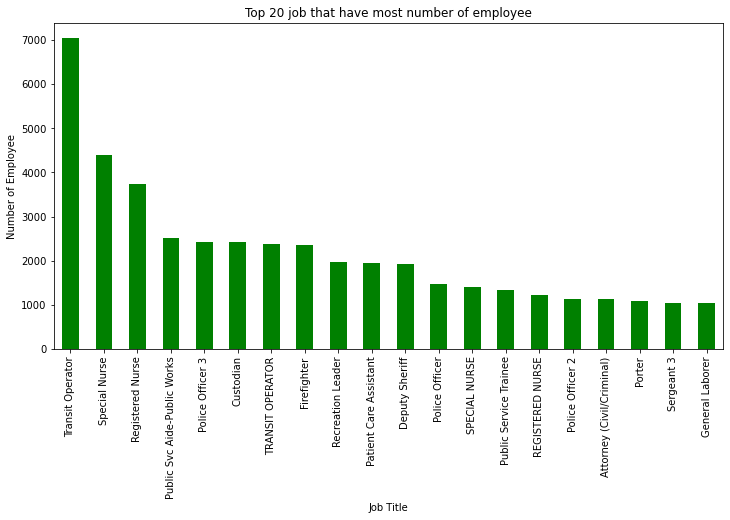

In [9]:
sal['JobTitle'].value_counts().head(20).plot(figsize=(12,6),kind='bar',color='green')
plt.xlabel('Job Title')
plt.ylabel('Number of Employee')
plt.title('Top 20 job that have most number of employee')

In [10]:
title=sum(sal['JobTitle'].value_counts()==1)
print('Number of Job Titles which are represented by only one person=',title)

Number of Job Titles which are represented by only one person= 239


### Salary

In [11]:
sal[['BasePay','OvertimePay','OtherPay']].describe()

,BasePay,OvertimePay,OtherPay
count,148045.000000,148650.000000,148650.000000
mean,66325.448841,5066.059886,3648.767297
std,42764.635495,11454.380559,8056.601866
min,-166.010000,-0.010000,-7058.590000
25%,33588.200000,0.000000,0.000000
50%,65007.450000,0.000000,811.270000
75%,94691.050000,4658.175000,4236.065000
max,319275.010000,245131.880000,400184.250000


In [12]:
sal[['JobTitle','TotalPayBenefits']].sort_values(by='TotalPayBenefits',ascending=False).head(20)
#Top 20 highest paid job

,JobTitle,TotalPayBenefits
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,567595.43
1,CAPTAIN III (POLICE DEPARTMENT),538909.28
110531,Deputy Chief 3,510732.68
110532,Asst Med Examiner,479652.21
110533,Chief Investment Officer,436224.36
72925,Chief of Police,425815.28
72926,"Chief, Fire Department",422353.40
110534,Chief of Police,418019.22
110535,"Chief, Fire Department",417435.10
110536,Asst Med Examiner,415767.94


In [13]:
base_pay=sum(sal['BasePay']==0)
print('Total number of persons who have zero base pay=',base_pay)

Total number of persons who have zero base pay= 1298


In [14]:
not_paid=sum(sal['TotalPayBenefits']==0)
print("Total number of jobs in which people wouldn't get paid=",not_paid)

Total number of jobs in which people wouldn't get paid= 30


<AxesSubplot:xlabel='Year', ylabel='TotalPayBenefits'>

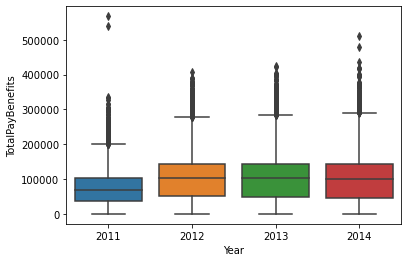

In [15]:
sns.boxplot(x='Year',y='TotalPayBenefits',data=sal)

In [17]:
sal_corr=sal[['BasePay','OvertimePay','OtherPay','Benefits']].corr()

<AxesSubplot:>

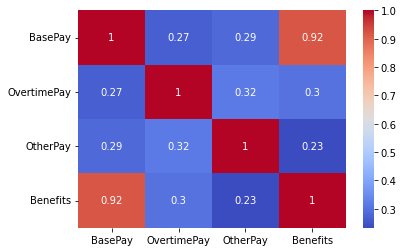

In [18]:
sns.heatmap(sal_corr,cmap='coolwarm',annot=True)